In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try:
    import hypernetx as hnx
except ImportError:
    print("Installing HyperNetX.........")
    !pip install hypernetx --quiet 2> /dev/null
    print("Installation complete; please rerun this cell in order for the rest of the cells to use HyperNetX.")
    exit()

import warnings
warnings.simplefilter(action='ignore')

### GraphViz is arguably the best graph drawing tool, but it is old and tricky to install.
### Uncommenting the line below will get you slightly better layouts, if you can get it working...

# from networkx.drawing.nx_agraph import graphviz_layout as layout

 No module named 'igraph'. If you need to use hypernetx.algorithms.hypergraph_modularity, please install additional packages by running the following command: pip install .['all']


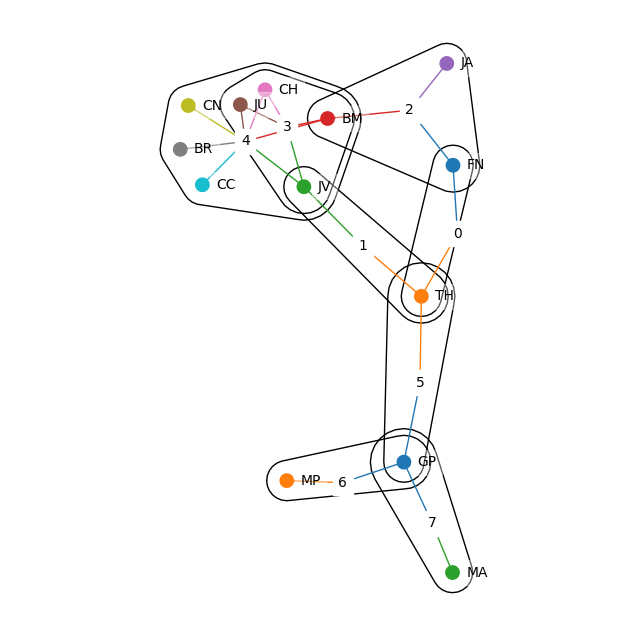

In [2]:
from importlib import reload; reload(hnx)

from collections import defaultdict

scenes = {
    0: ('FN', 'TH'),
    1: ('TH', 'JV'),
    2: ('BM', 'FN', 'JA'),
    3: ('JV', 'JU', 'CH', 'BM'),
    4: ('JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'),
    5: ('TH', 'GP'),
    6: ('GP', 'MP'),
    7: ('MA', 'GP')
}

H = hnx.Hypergraph(scenes)

colors = defaultdict(lambda: plt.cm.tab10(len(colors)%10))

def get_node_color(v):
    return colors[v]

def get_cell_color(e):
    return get_node_color(e[1])

hnx.draw(
    H,
    with_additional_edges=H.bipartite(),
    edges_kwargs={'edgecolors': 'black'},
    nodes_kwargs={'color': get_node_color},
    additional_edges_kwargs={'edge_color': get_cell_color},
    edge_labels_on_edge=False, edge_label_alpha=1

)

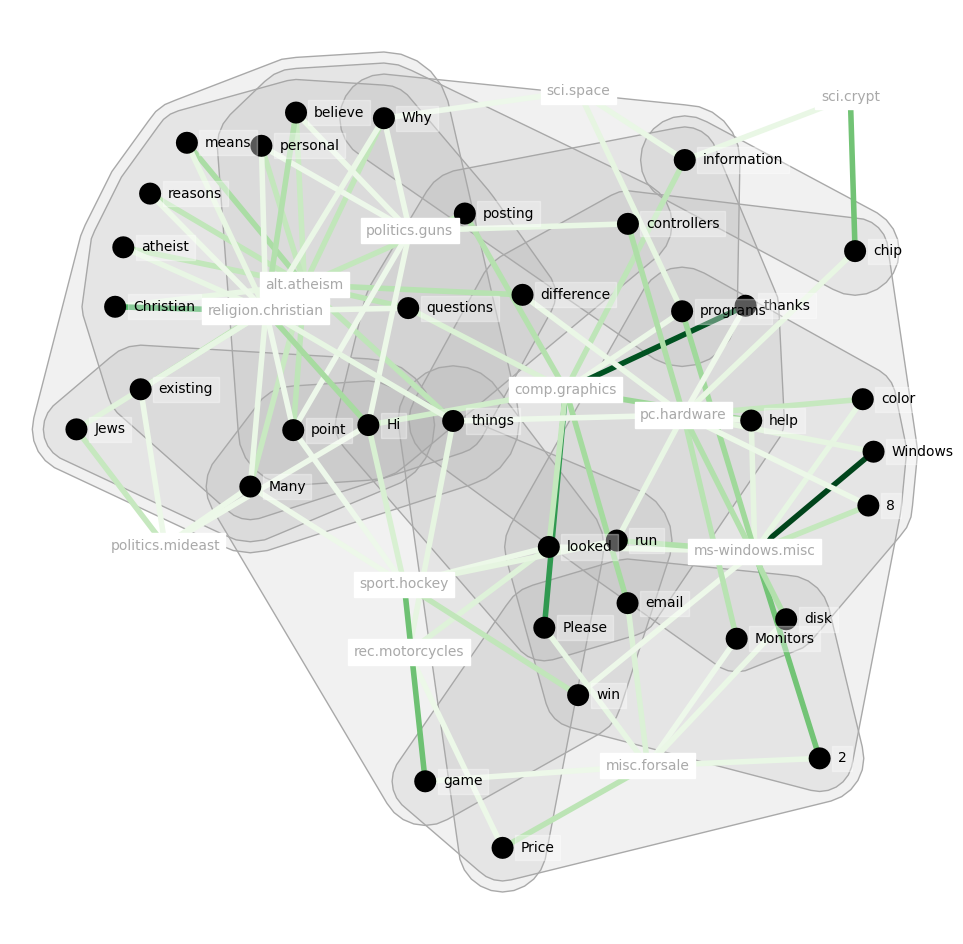

In [3]:
import networkx as nx

threshold = 0.1

df = pd.read_csv('./newsgroups-topics.csv', index_col=0)
df.index = df.index.map(lambda s: '.'.join(s.split('.')[-2:]))

incidence_matrix = df.copy()

# filter out singletons
incidence_matrix = df[df.columns[(df >= threshold).sum(axis=0) > 1]]

# filter out small weights
incidence_matrix[incidence_matrix < threshold] = None

# construct hypergraph
H = hnx.Hypergraph.from_incidence_dataframe(incidence_matrix.T)
weights = H.edges.cell_properties.cell_weights

# create functions for mapping hyper edges/weights to colors
norm = plt.Normalize(0, incidence_matrix.max().max())
cmap = plt.cm.Greens

def get_cell_color(e):
    return cmap(norm(weights.loc[e]))

plt.figure(figsize=(12, 12))
hnx.draw(
    H,
    layout=nx.kamada_kawai_layout,
    with_additional_edges=H.bipartite(),
    edges_kwargs={
        'edgecolors': 'darkgray',
        'facecolors': (.65, .65, .65, .15)
    },
    additional_edges_kwargs={
        'edge_color': get_cell_color,
        'width': 4,
    },
    edge_labels_on_edge=False, edge_label_alpha=1
)